In [2]:
import numpy as np
import matplotlib.pyplot as plt

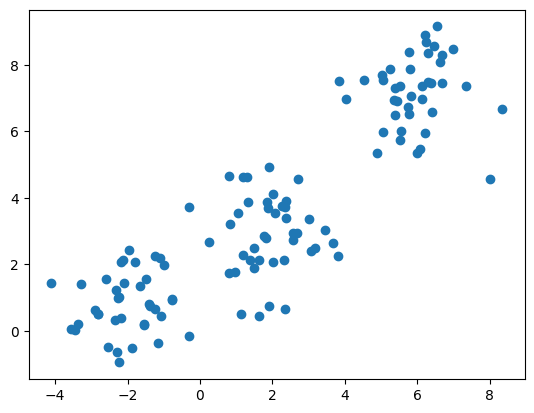

In [62]:
cluster_1 = np.random.normal(size=(40, 2), loc=(2, 3))
cluster_2 = np.random.normal(size=(40, 2), loc=(6, 7))
cluster_3 = np.random.normal(size=(40, 2), loc=(-2, 1))

data = np.concatenate([cluster_1, cluster_2, cluster_3])
plt.scatter(data[:, 0], data[:, 1])

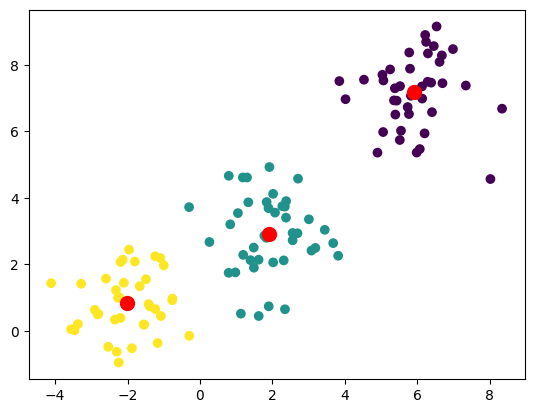

In [117]:
def distance(p1, p2):
    return ((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)**0.5

def k_means_clustering(data, k):
    n = data.shape[0]
    centroids = data[np.random.choice(n, k, replace=False)]
    assignments = np.zeros(n)
    while True:
        for i in range(n):
            distances = [distance(data[i], centroids[j]) for j in range(k)]
            assignments[i] = np.argmin(distances)

        new_centroids = np.zeros((k, 2))
        for j in range(k):
            new_centroids[j] = np.mean(data[assignments == j], axis=0)

        if np.allclose(centroids, new_centroids):
            break
  
        centroids = new_centroids

    return centroids, assignments

centroids, assignments = k_means_clustering(data, 3)
plt.scatter(data[:, 0], data[:, 1], c=assignments)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)


